In [22]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import RD_model


dim=1
hidden=[16,64,64,16,dim]
test_x = np.linspace(0,1,1001,endpoint=True).reshape(1001,1)
test_x = torch.tensor(test_x).float()
true_f = lambda u: u*(1-u)
para_mat = np.ndarray((1,50))
nonpara_mat = np.ndarray((1001,50))
u_mat = np.ndarray((1,50))
for i in range(50):
    checkpoints = torch.load('checkpoint_paramodel/ckpt_rd_64_16_25_0.100_0.003_%d.pth'%(i))
    model_net = RD_model.NonParametricModel(state_dim=dim,hidden=hidden)
    model_net.net.load_state_dict(checkpoints['net'])
    para_mat[:,i] = checkpoints['D'].to('cpu').detach().numpy()*1e-3
    nonpara_mat[:,i:(i+1)] = (model_net.net(test_x) - true_f(test_x)).detach().to('cpu').numpy()
    u_mat[:,i] = checkpoints['u_loss']
bias = np.mean(para_mat,axis=1) - 3e-3
std = np.sqrt(np.mean(np.square(para_mat - np.mean(para_mat,axis=1)),axis=1))
rmse = np.sqrt(bias**2 + std**2)
bias_non = np.sqrt(np.mean(np.square(np.mean(nonpara_mat,axis=1))))
std_non = np.sqrt(np.mean(np.square(nonpara_mat -np.mean(nonpara_mat,axis=1,keepdims=True))))
rmse_non = np.sqrt(bias_non**2 + std_non**2)
rmse_u = np.sqrt(np.mean(u_mat,axis=1))
print('bias for D:%.5fe-5'%(bias*1e5))
print('std for D:%.5fe-5'%(std*1e5))
print('rmse for D:%.5fe-5'%(rmse*1e5))
print('bias for f:%.5fe-5'%(bias_non*1e5))
print('std for f:%.5fe-5'%(std_non*1e5))
print('rmse for f:%.5fe-5'%(rmse_non*1e5))
print('rmse for u:%.5fe-5'%(rmse_u*1e5))


/tmp/ipykernel_99572/60590436.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoints = torch.load('checkpoint_paramodel/ckpt_rd_64_16_25_0.100_0.003_%d.pth'%(i))


bias for D:17.58249e-5
std for D:41.42815e-5
rmse for D:45.00484e-5
bias for f:18237.72272e-5
std for f:67.65474e-5
rmse for f:18237.84820e-5
rmse for u:146.78137e-5


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import PINN_model


dim=1
hidden=[16,64,64,16,dim]
test_x = np.linspace(0,1,1001,endpoint=True).reshape(1001,1)
test_x = torch.tensor(test_x).float()
true_f = lambda u: u*(1-u)
para_mat = np.ndarray((1,50))
nonpara_mat = np.ndarray((1001,50))
u_mat = np.ndarray((1,50))
for i in range(50):
    checkpoints = torch.load('checkpoint_paramodel/ckpt_rd_pinn2_64_16_25_0.500_0.003_%d.pth'%(i))
    model_net = PINN_model.RDEquation(state_dim=dim,hidden=hidden)
    model_net.net.load_state_dict(checkpoints['PDE_model_net'])
    para_mat[:,i] = checkpoints['D'].to('cpu').detach().numpy()
    nonpara_mat[:,i:(i+1)] = (model_net.net(test_x) - true_f(test_x)).detach().cpu().numpy()
    u_mat[:,i] = checkpoints['u_loss']
bias = np.mean(para_mat,axis=1) - 3e-3
std = np.sqrt(np.mean(np.square(para_mat - np.mean(para_mat,axis=1)),axis=1))
rmse = np.sqrt(bias**2 + std**2)
bias_non = np.sqrt(np.mean(np.square(np.mean(nonpara_mat,axis=1))))
std_non = np.sqrt(np.mean(np.square(nonpara_mat -np.mean(nonpara_mat,axis=1,keepdims=True))))
rmse_non = np.sqrt(bias_non**2 + std_non**2)
rmse_u = np.sqrt(np.mean(u_mat,axis=1))
print('bias for D:%.5fe-5'%(bias*1e5))
print('std for D:%.5fe-5'%(std*1e5))
print('rmse for D:%.5fe-5'%(rmse*1e5))
print('bias for f:%.5fe-5'%(bias_non*1e5))
print('std for f:%.5fe-5'%(std_non*1e5))
print('rmse for f:%.5fe-5'%(rmse_non*1e5))
print('rmse for u:%.5fe-5'%(rmse_u*1e5))


/tmp/ipykernel_99572/3667149919.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoints = torch.load('checkpoint_paramodel/ckpt_rd_pinn2_64_16_25_0.500_0.003_%d.pth

bias for D:-124.60063e-5
std for D:546.73654e-5
rmse for D:560.75499e-5
bias for f:7634.71291e-5
std for f:31209.85943e-5
rmse for f:32130.11308e-5
rmse for u:nane-5


/tmp/ipykernel_99572/3667149919.py:29: RuntimeWarning: invalid value encountered in sqrt
  rmse_u = np.sqrt(np.mean(u_mat,axis=1))


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import RD_model


dim=1
hidden=[16,64,64,16,dim]
u_mat = np.ndarray((1,50))
for i in range(50):
    checkpoints = torch.load('checkpoint/ckpt_rd2_nonpara_64_16_25_0.100_0.003_%d.pth'%(i))
    u_mat[:,i] = checkpoints['u_loss']

rmse_u = np.sqrt(np.mean(u_mat,axis=1))
print('rmse for u:%.5fe-5'%(rmse_u*1e5))


/home/yuanyuanbenben/anaconda3/envs/nnbase/lib/python3.8/site-packages/ignite/handlers/checkpoint.py:16: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import ZeroRedundancyOptimizer
/tmp/ipykernel_142104/4280306909.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted

rmse for u:2458.02589e-5


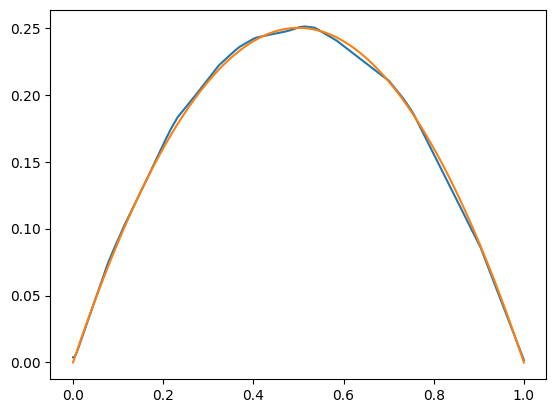

In [31]:
plt.plot(test_x,model_net.net(test_x).detach(),test_x,true_f(test_x))